## Lifestyle of a Data Science Projects

1. Data Collection 
* from company side 
* 3rd party APIs 
* from surveys


2. Feature Engineering
* Handling Missing Values

## Types of missing data

1. ##### Missing Completely At Random, MCAR

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.
If values for observations are missing completely at random, then disregarding those cases would not bias the interferences made.

Example -> 
* In the titanic data present below, this data is collected after the accident. 
* In this data we can see Age and Cabin has null values (can this data be related to each other?)
* YES, there is a relationship
* On the basis of this, we CANNOT say that these particular missing values are of MCAR type
* Now look at embarked column, it is an example MCAR, the missing values have no relation with the other columns present.

2. ##### Missing Data Not At Random, MNAR (Systematic Missing Values)

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

Example ->
* Age and Cabin column

3. ##### Missing at Random, MAR

This can be same in most of the data

Example ->
* In a survey where we have gender(Male, Female) column and in relation to this, some of the males might have not filled the salary column and some of the females might have not filled the age column. 

### Why missing values are present?
If someone is taking a survey then :-

1. People might hesitate to put down the information (because of this, survey informations are not that valid) like men hesitate to disclose their salary
2. People may have died so that we are not able to retrieve the required data while doing an updated survey

### Data Science Project

1. Dataset should be collected from multiple sources

### Data that will be missing

1. Continuous data -> Age, weight (any type of values)
2. Categorical data -> Sex (Male or Female)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# MCAR

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
# np.where function and replacing cabin values with 1 and 0

import numpy as np

df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

# find the percentage of null values

In [9]:
df['Cabin_null'].mean()

0.7710437710437711

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [17]:
df.groupby(df['Survived'])['Cabin_null'].mean()

# 60%age of them are having missing values
# 87%age of them are having missing values

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# All the techniques of handling missing values

### 1. Mean/ Median/ Mode replacement
### 2. Random Sample Imputation
### 3. Capturing NAN values with a new feature
### 4. End of Distribution imputation 
### 5. Arbitrary imputation 
### 6. Frequent categories imputation

# 1. Mean/ Median/ Mode imputation

When should we apply?

Mean/Median imputation has the assumption that the data are missing completely at random (MCAR).
Solve this by replacing the NAN with the most frequent occurence of the variable.

In [19]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
# Let's go and see %age of NAN values

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
# Creating function to replace NAN values with median

def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

In [22]:
# Checking the value of median

median = df['Age'].median()
median

28.0

In [23]:
# Calling function to replace the values
# giving 3 arguments (dataframe, variable which is column name, median itself)

impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [26]:
# Comparing standard deviation before and after replacing the NAN values

print(df['Age'].std())
print(df['Age_median'].std())

# We conclude there is just a minor difference so we will not be having any problems

14.526497332334044
13.019696550973194


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

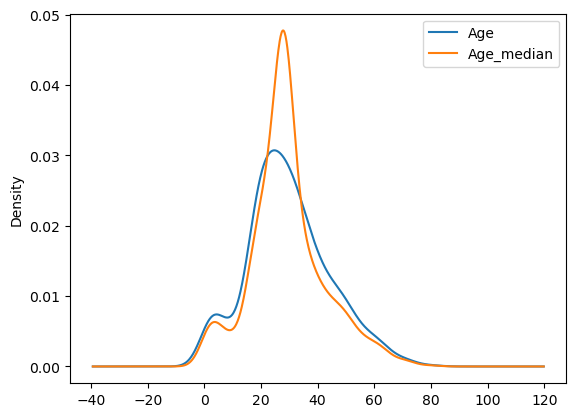

In [32]:
df['Age'].plot(kind='kde')
df['Age_median'].plot(kind='kde')
plt.legend()

### Advantages and Disadvantages of Mean/ Median imputation

1. Advantages
* Easy to implement (Robust to Outliers)
* Faster way to obtain the complete dataset

2. Disadvantages
* Change or distortion in the original variance of the data 
* Impacts correlation

# 2. Random Sample Imputation

* What is the aim?
    * Random sample imputation is consists of taking random observation from the dataset and we use this observation to replace       the NAN values

* When it should be used?
    * It assumes that the data are missing completely at random (MCAR)

In [44]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [45]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [46]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [49]:
# We are going to place this inside sample()

df['Age'].isnull().sum()

177

In [48]:
# sample() will randomly pick any value, run this cell multiple times and the value will change everytime

df['Age'].dropna().sample()

8    27.0
Name: Age, dtype: float64

In [55]:
# Replacing NAN count in sample()
""" random_state=0: In simple terms, it means that the random sampling will give the same result every time the 
code is run with this specific random seed."""

""".sample(df['Age'].isnull().sum(), random_state=0): This part randomly samples from the non-missing age values 
a number of times equal to the count of missing values in the original 'Age' column (df['Age'].isnull().sum()). 
By doing this, it essentially replaces the missing age values with random ages drawn from the available non-missing 
ages in the dataset."""

# We used dropna() because we will pick values from df['Age'].dropna() and then by using sample() we will pick those values from df['Age'].dropna() and then we will insert those values where there are NAN values

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [61]:
median = df['Age'].median()
median

28.0

In [60]:
# indexes where the values are NAN

df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [62]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    
    # Create a new column to hold values imputed using random sampling
    df[variable+'_random'] = df[variable]
    
    # In random_sample, that column is stored in which NAN values are replaced
    # Randomly sample non-missing values to fill missing values
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    # We need to merge the data present in random_sample with the origianl data and for that pandas need to have same index
    # Set the index of the random_sample to match the index of missing values
    random_sample.index = df[df[variable].isnull()].index
    
    # Fill missing values with randomly sampled values
    #The missing values in the variable column are replaced with the randomly sampled values, and these values are stored in the [variable+'_random'] column.
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [64]:
impute_nan(df,'Age',median)

In [65]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


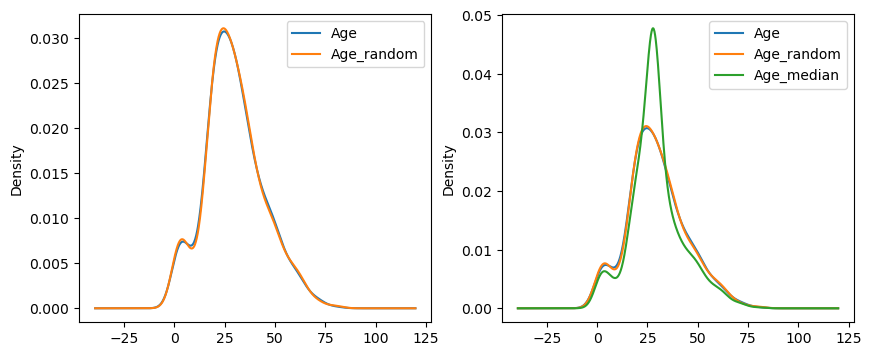

In [76]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
df['Age'].plot(kind='kde')
df['Age_random'].plot(kind='kde')
plt.legend()

plt.subplot(1,2,2)
df['Age'].plot(kind='kde')
df['Age_random'].plot(kind='kde')
df['Age_median'].plot(kind='kde')
plt.legend()

In [77]:
# After replacing NAN values with RANDOM SAMPLING
# Now we can see that the data is having NEGLIGIBLE impact with RANDOM SAMPLING as compared to data replaced with MEAN/MEDIAN imputation

### Advantages and Disadvantages

1. Advantages
* Easy to implement
* There is less distortion in variance

2. Disadvantages
* In every situation, randomness WILL NOT work

# 3. Capturing NAN values with a new feature 

* It works well if the data are not missing completely at random (MNAR)

In [88]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [89]:
# Capturing NAN values as 0 or 1 in new feature called 'Age_NAN'

df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [90]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [91]:
median = df['Age'].median()

In [92]:
df['Age'] = df['Age'].fillna(median)
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages and Disadvantages

1. Advantages
* Easy to implement
* Captures the importance of missing values

2. Disadvantages
* Creating additional features
* It is not recommended to use with larger number of columns, suppose we have 200 columns and every column has missing values and by using this method it will create 200 more columns which is not a good way of solving a data
* Curse of Dimensionality (search google or watch video for understanding)

# 4. End of Distribution imputation

#### In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable. The advantage is that it is quick and captures the importance of missing values (if one suspects the missing data is valuable).

1. We are going to get the value that is present 3 standard deviation to the right
2. Then we will add that value to the mean of the age

In [95]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [97]:
# We have taken the right side outliers because there are no outliers on the left

extreme = df['Age'].mean() + 3*df['Age'].std()
extreme

73.27860964406095

In [98]:
# Let's check the outliers

import seaborn as sns

<Axes: xlabel='Age'>

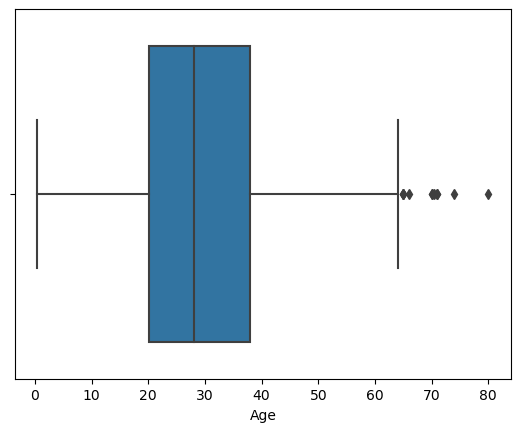

In [101]:
sns.boxplot(x='Age',data=df)

In [102]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable] = df[variable].fillna(median)

In [104]:
impute_nan(df,'Age',median,extreme)

In [105]:
# We have replaced original column (age) containing NAN values with age.median() to compare it with Age_end_distribution, we can also create a new column separately as well.

df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

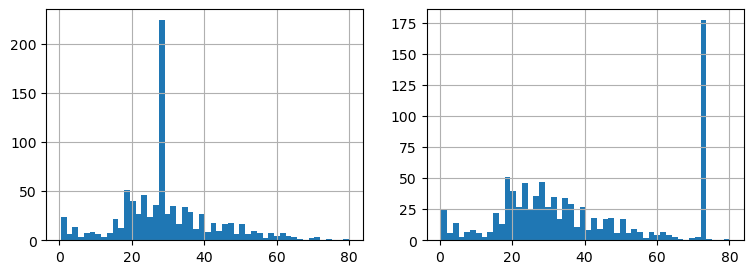

In [115]:
plt.figure(figsize=(9,3))

plt.subplot(1,2,1)
df['Age'].hist(bins=50)

plt.subplot(1,2,2)
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

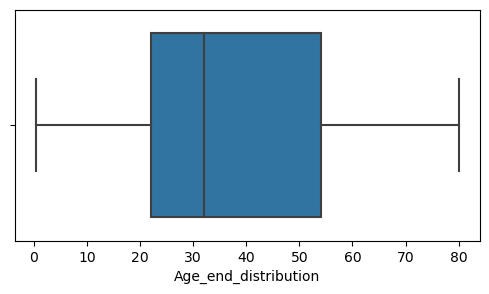

In [119]:
# To check which one is better we will again draw BOXPLOT

plt.figure(figsize=(6,3))
sns.boxplot(x='Age_end_distribution',data=df)

# Now we can see that the outliers are gone
# The outliers have been captured by using the end of distribution

# 5. Arbitrary imputation

#### This technique was derived from kaggle competition so it not that useful and not sure where to use it
#### It consists of replacing NAN by an arbitrary value

In [121]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

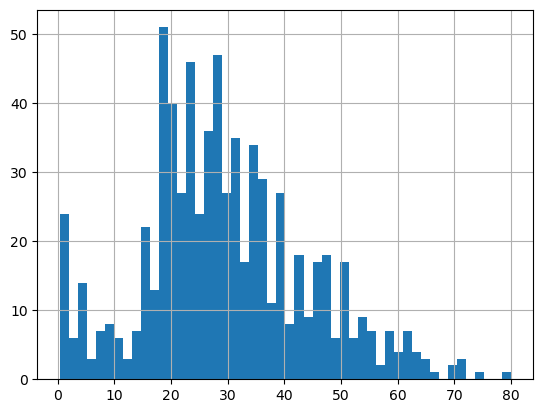

In [122]:
df['Age'].hist(bins=50)

In [ ]:
# In this case we are going to use 0 and 100 to fill NAN because they are at the left and right most end respectively.

#### Arbitrary Property:-

* It should not be more frequently present

1. Advantages
* Easy to implement 
* Captures the importance of missing values

2. Disadvantages
* Distorts the original distribution of the variable
* Hard to decide which value to use

In [123]:
def impute_nan(df,variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundered'] = df[variable].fillna(100)

# How To Handle Categorical Missing Values

# 6. Frequent Category Imputation

In [124]:
df = pd.read_csv('train_categorical.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [127]:
df.isnull().mean().sort_values()

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<Axes: xlabel='BsmtQual'>

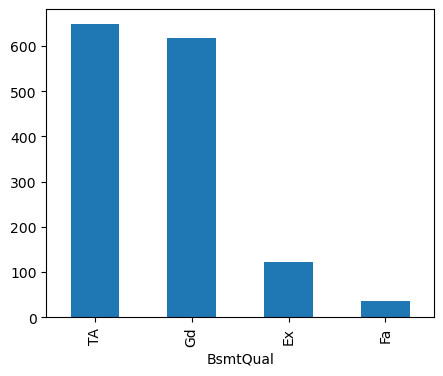

In [138]:
# Compute the Frequency with every feature
# We can also use mode

plt.figure(figsize=(5,4))
df['BsmtQual'].value_counts().plot.bar()

<Axes: xlabel='GarageType'>

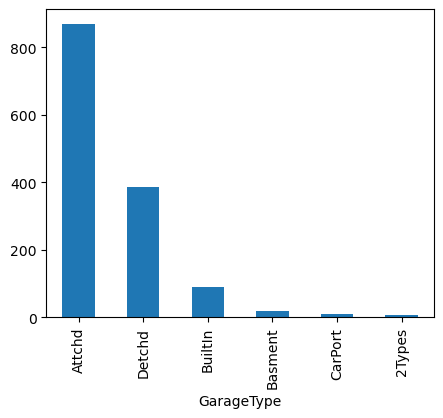

In [137]:
plt.figure(figsize=(5,4))
df['GarageType'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

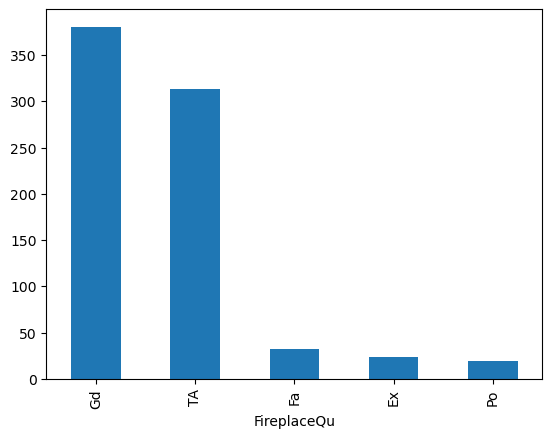

In [139]:
df['FireplaceQu'].value_counts().plot.bar()

In [140]:
# Picking up index

df['BsmtQual'].value_counts().index[0]

'TA'

In [141]:
# creating function to replace NAN

def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [142]:
# using for loop to finally imputing values
# We can also do it the other way, but with for loop we will be writing less code

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [143]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

#### 1. Advantages
* Easy to implement
* Faster way to implement

#### 2. Disadvantages
* Since we are using the more frequent labels, it may use them in an over represented way if there are many NANs
* It distorts the relation of the most frequent label

### Adding a variable to capture NAN

In [154]:
df = pd.read_csv('train_categorical.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [157]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var,BsmtQual_var
0,Gd,Gd,Attchd,208500,1,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [158]:
frequent = df['BsmtQual'].mode()[0]

In [159]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [160]:
# doing the same with other feature

df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [161]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var,BsmtQual_var
0,Gd,Gd,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### If we have more frequent categories, we just replace NAN with a NEW category

In [162]:
df = pd.read_csv('train_categorical.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [163]:
def impute_nan(df,variable):
    df[variable+'_newvar'] = np.where(df[variable].isnull(),'Missing',df[variable])

In [164]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [165]:
# Remember, after imputing NAN then we don't need the original features.

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [167]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


# Handling Categorical Features

### One Hot Encoding

* Remember if there are n number of features then in this encoding we will take n-1 features

In [169]:
df = pd.read_csv('train.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [174]:
pd.get_dummies(df,dtype=int,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [175]:
df = pd.read_csv('train.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [177]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [179]:
df = df.dropna()

In [182]:
pd.get_dummies(df,drop_first=True,dtype=int).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### One Hot Encoding with Many Categorical Features

In [184]:
df = pd.read_csv('Benz.csv',usecols=['X0','X1','X2','X3','X4','X5'])
df.head()

,X0,X1,X2,X3,X4,X5
0,k,v,at,a,d,u
1,k,t,av,e,d,y
2,az,w,n,c,d,x
3,az,t,n,f,d,x
4,az,v,n,f,d,h


In [185]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29


In [186]:
# We have too many categories in these columns, so it is better NOT to use One Hot Encoding.
# We will rather choose top 10 frequently occuring categories and then we will perform One Hot Encoding

In [188]:
df['X1'].value_counts().head(10)

X1
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: count, dtype: int64

In [192]:
list(df['X1'].value_counts().head(10).index)

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [193]:
lst_10 = list(df['X1'].value_counts().head(10).index)

In [194]:
# Now we have top 10 categories in a list
# We will perform One Hot Encoding using for loop

for category in lst_10:
    df[category] = np.where(df['X1']==category,1,0)

In [195]:
# We are appending X1 to lst_10 so that we can see it side by side

lst_10.append('X1')

In [197]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
